In [2]:
import warnings
import pandas as pd
import matplotlib as mpl # 그래프 옵션
import matplotlib.pyplot as plt # 그래프 출력시
import seaborn as sns
from IPython.display import set_matplotlib_formats
warnings.filterwarnings('ignore')
%matplotlib inline 
#그래프 시각화 옵션
mpl.rc('font',family='Malgun Gothic')
#글씨 선명히
set_matplotlib_formats
#음수 처리
mpl.rc('axes',unicode_minus=False)
#matplotlib.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus']=False
table1 = pd.read_csv("./test/201701.csv")
table1.head().T
# column, index, value가 가장 중요
pd.options.display.max_columns=100

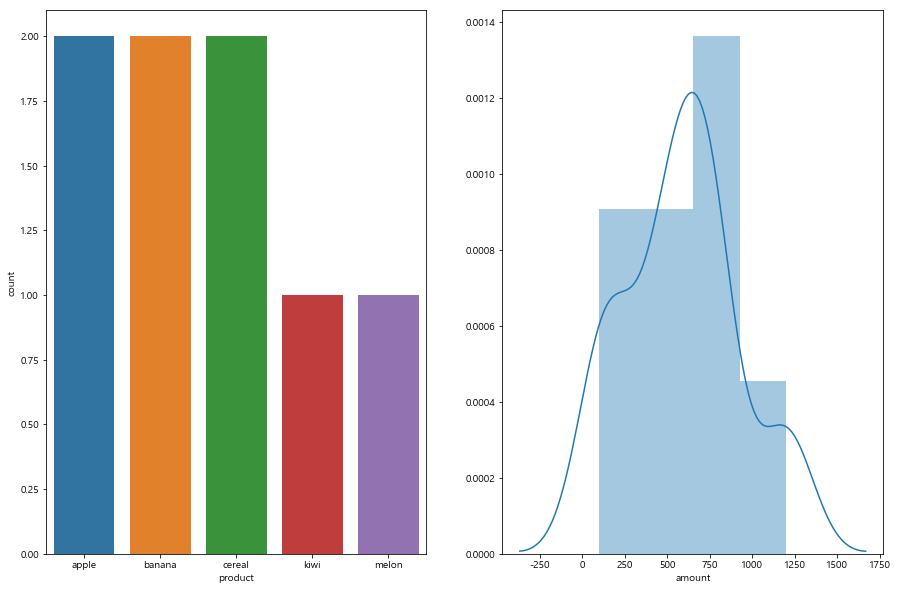

In [3]:
figure, ((ax1,ax2))=plt.subplots(nrows=1,ncols=2)
figure.set_size_inches(15,10)
sns.countplot(table1['product'],ax=ax1)
sns.distplot(table1['amount'],ax=ax2)

# Date

In [4]:
table1['date']

0    2017-01-01
1    2017-01-03
2    2017-01-05
3    2017-01-07
4    2017-01-08
5    2017-01-09
6    2017-01-09
7    2017-01-10
Name: date, dtype: object

In [5]:
table1['date(clean)'] = pd.to_datetime(table1['date'])
table1

,Name,date,amount,product,result,date(clean)
0,Kang,2017-01-01,500,apple,confirmed,2017-01-01
1,Kim,2017-01-03,700,banana,confirmed,2017-01-03
2,Choi,2017-01-05,800,apple,confirmed,2017-01-05
3,Park,2017-01-07,500,cereal,canceled,2017-01-07
4,Kang,2017-01-08,1200,kiwi,confirmed,2017-01-08
5,Choi,2017-01-09,100,melon,confirmed,2017-01-09
6,Lee,2017-01-09,700,banana,confirmed,2017-01-09
7,Yoon,2017-01-10,200,cereal,canceled,2017-01-10


In [6]:
table1['date(clean)'].dt.month

0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
Name: date(clean), dtype: int64

In [7]:
table1['date(clean)'].dt.weekday_name

0      Sunday
1     Tuesday
2    Thursday
3    Saturday
4      Sunday
5      Monday
6      Monday
7     Tuesday
Name: date(clean), dtype: object

In [8]:
table1['date(month)'] = table1['date(clean)'].dt.month
table1['date(day)'] = table1['date(clean)'].dt.day
table1['date(day_of_week)'] = table1['date(clean)'].dt.weekday_name
table1[['date(month)','date(day)','date(day_of_week)']].head()

,date(month),date(day),date(day_of_week)
0,1,1,Sunday
1,1,3,Tuesday
2,1,5,Thursday
3,1,7,Saturday
4,1,8,Sunday


# Replace

In [9]:
table1['result']

0    confirmed
1    confirmed
2    confirmed
3     canceled
4    confirmed
5    confirmed
6    confirmed
7     canceled
Name: result, dtype: object

In [10]:
table1['result(clean)'] = table1['result'].replace('confirmed','확인').replace('canceled','취소')
table1[['result','result(clean)']]

,result,result(clean)
0,confirmed,확인
1,confirmed,확인
2,confirmed,확인
3,canceled,취소
4,confirmed,확인
5,confirmed,확인
6,confirmed,확인
7,canceled,취소


# Apply
- **DataFrame Handling에 있어서 강력한 함수**

In [11]:
def num(data):
    return data == 'apple'
table1['product'].apply(num)

0     True
1    False
2     True
3    False
4    False
5    False
6    False
7    False
Name: product, dtype: bool

In [20]:
table1.describe().round(2)

,amount,date(month),date(day)
count,8.00,8.0,8.00
mean,587.50,1.0,6.50
std,348.21,0.0,3.21
min,100.00,1.0,1.00
25%,425.00,1.0,4.50
50%,600.00,1.0,7.50
75%,725.00,1.0,9.00
max,1200.00,1.0,10.00


# 범주형(string) 형태로도 기술 가능

In [19]:
table1[['product','result']].describe()

,product,result
count,8,8
unique,5,2
top,apple,confirmed
freq,2,6


In [24]:
table1[(table1['amount']>200) & (table1['result']=='canceled')]

,Name,date,amount,product,result,date(clean),date(month),date(day),date(day_of_week),result(clean)
3,Park,2017-01-07,500,cereal,canceled,2017-01-07,1,7,Saturday,취소


In [31]:
a = table1[(table1['amount']>200) & (table1['result']=='canceled')]
table1[a]

ValueError: Must pass DataFrame with boolean values only

# loc

In [27]:
table1['date']

0    2017-01-01
1    2017-01-03
2    2017-01-05
3    2017-01-07
4    2017-01-08
5    2017-01-09
6    2017-01-09
7    2017-01-10
Name: date, dtype: object

In [33]:
table1.loc[3:5][['amount','product']]

,amount,product
3,500,cereal
4,1200,kiwi
5,100,melon


In [53]:
def function1(row):
    return row[0:4]+"년"+row[5:7]+"월"+row[8:]+"일"
def function2(row):
    return row[0:4]+row[5:7]+row[8:]
def info(row):
    print(row.value_counts())
    print(row.describe())
table1[['Name','result','product']].apply(info)

Kang    2
Choi    2
Yoon    1
Park    1
Kim     1
Lee     1
Name: Name, dtype: int64
count        8
unique       6
top       Kang
freq         2
Name: Name, dtype: object
confirmed    6
canceled     2
Name: result, dtype: int64
count             8
unique            2
top       confirmed
freq              6
Name: result, dtype: object
apple     2
banana    2
cereal    2
kiwi      1
melon     1
Name: product, dtype: int64
count         8
unique        5
top       apple
freq          2
Name: product, dtype: object


Name       None
result     None
product    None
dtype: object

In [54]:
def function3(row):
    if 'a' in row:
        return 'A'
    else:
        return 'B'
table1['product'].apply(function3)

0    A
1    A
2    A
3    A
4    B
5    B
6    A
7    A
Name: product, dtype: object

In [58]:
table1.rename(columns={'Name':'이름'},inplace=True)
table1

,이름,date,amount,product,result,date(clean),date(month),date(day),date(day_of_week),result(clean)
0,Kang,2017-01-01,500,apple,confirmed,2017-01-01,1,1,Sunday,확인
1,Kim,2017-01-03,700,banana,confirmed,2017-01-03,1,3,Tuesday,확인
2,Choi,2017-01-05,800,apple,confirmed,2017-01-05,1,5,Thursday,확인
3,Park,2017-01-07,500,cereal,canceled,2017-01-07,1,7,Saturday,취소
4,Kang,2017-01-08,1200,kiwi,confirmed,2017-01-08,1,8,Sunday,확인
5,Choi,2017-01-09,100,melon,confirmed,2017-01-09,1,9,Monday,확인
6,Lee,2017-01-09,700,banana,confirmed,2017-01-09,1,9,Monday,확인
7,Yoon,2017-01-10,200,cereal,canceled,2017-01-10,1,10,Tuesday,취소


# subplot

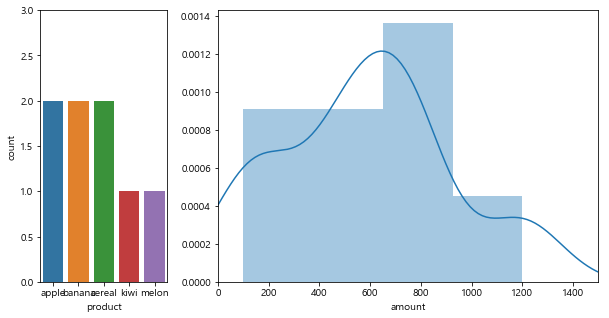

In [72]:
figure, ((ax1,ax2)) = plt.subplots(nrows=1,ncols=2,
                                  gridspec_kw={'width_ratios':[1,3]})
figure.set_size_inches(10,5)
ax1.set_ylim(0,3)
ax2.set_xlim(0,1500)
sns.countplot(table1['product'],ax=ax1)
sns.distplot(table1['amount'],ax=ax2)

# Nan값 설정
- **테이블명.loc[(조건), '값이들어갈colum']='대입할 값'**

In [75]:
import numpy as np
table1.loc[(table1['amount']>1000),'amount']=np.nan
table1

,이름,date,amount,product,result,date(clean),date(month),date(day),date(day_of_week),result(clean)
0,Kang,2017-01-01,500.0,apple,confirmed,2017-01-01,1,1,Sunday,확인
1,Kim,2017-01-03,700.0,banana,confirmed,2017-01-03,1,3,Tuesday,확인
2,Choi,2017-01-05,800.0,apple,confirmed,2017-01-05,1,5,Thursday,확인
3,Park,2017-01-07,500.0,cereal,canceled,2017-01-07,1,7,Saturday,취소
4,Kang,2017-01-08,NaN,kiwi,confirmed,2017-01-08,1,8,Sunday,확인
5,Choi,2017-01-09,100.0,melon,confirmed,2017-01-09,1,9,Monday,확인
6,Lee,2017-01-09,700.0,banana,confirmed,2017-01-09,1,9,Monday,확인
7,Yoon,2017-01-10,200.0,cereal,canceled,2017-01-10,1,10,Tuesday,취소
